In [2]:
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pycbc.waveform
from pycbc.waveform import get_td_waveform
from pycbc.waveform import get_fd_waveform
from pycbc.psd import estimate
from pycbc.types import TimeSeries
import emcee
import corner
import time
from multiprocessing import Pool
from multiprocessing import cpu_count
import scipy
import gwpy
from gwpy.detector import ChannelList, Channel
from gwpy.timeseries import TimeSeries
from gwpy.time import tconvert
import pycbc.catalog
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import bilby


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [3]:
catalog = pycbc.catalog.Catalog()

# Retrieve and print the names of available merger events
event_names = catalog.names
for name in event_names:
    print(name)

GW200322_091133-v1
GW200316_215756-v1
GW200311_115853-v1
GW200308_173609-v1
GW200306_093714-v1
GW200302_015811-v1
GW200225_060421-v1
GW200224_222234-v1
GW200220_124850-v1
GW200220_061928-v1
GW200219_094415-v1
GW200216_220804-v1
GW200210_092254-v1
GW200209_085452-v1
GW200208_222617-v1
GW200208_130117-v1
GW200202_154313-v1
GW200129_065458-v1
GW200128_022011-v1
GW200115_042309-v2
GW200112_155838-v1
GW191230_180458-v1
GW191222_033537-v1
GW191219_163120-v1
GW191216_213338-v1
GW191215_223052-v1
GW191204_171526-v1
GW191204_110529-v1
GW191129_134029-v1
GW191127_050227-v1
GW191126_115259-v1
GW191113_071753-v1
GW191109_010717-v1
GW191105_143521-v1
GW191103_012549-v1


starts at 1265273695 occurs at 1265273710.1 

4096 smaples every second for 32 seconds

In [4]:
# # loading in data 
# strain_data = np.loadtxt('GW200209_085452.txt',skiprows = 3).T
# # time_noise, strain_noise = np.loadtxt('data/PE_unknown_white_noise_ts.txt',skiprows=1).T

# delta_f = 4096
# delta_t = 1/delta_f
# duration = len(strain_data)*delta_t
# start_time = 1265273695
# end_time = start_time+32
# time_col = 1265273710.1 
# print(duration)
# time = np.linspace(start_time,end_time,len(strain_data))

# print(len(strain_data))
# print(time_col)

In [5]:
# plt.plot(time,strain_data)
# plt.xlim(time_col-0.5,time_col+0.5)

In [6]:
# for ifo in ['H1', 'L1']:
#     # Read data and remove low frequency content
#     h1 = Merger("GW200209_085452-v1").strain(ifo)
#     h1 = highpass_fir(h1, 15, 8)

#     # Calculate the noise spectrum
#     psd = interpolate(welch(h1), 1.0 / h1.duration)

#     # whiten
#     white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()

#     # remove some of the high and low
#     smooth = highpass_fir(white_strain, 35, 8)
#     smooth = lowpass_fir(smooth, 300, 8)

#     # time shift and flip L1
#     if ifo == 'L1':
#         smooth *= -1
#         smooth.roll(int(.007 / smooth.delta_t))

#     plt.plot(smooth.sample_times, smooth, label=ifo)

# plt.legend()
# # plt.xlim(1126259462.21, 1126259462.45)
# plt.ylim(-150, 150)
# plt.ylabel('Smoothed-Whitened Strain')
# plt.grid()
# plt.xlabel('GPS Time (s)')
# plt.show()


# delta_f = 4096
# delta_t = 1/4096
# duration = 

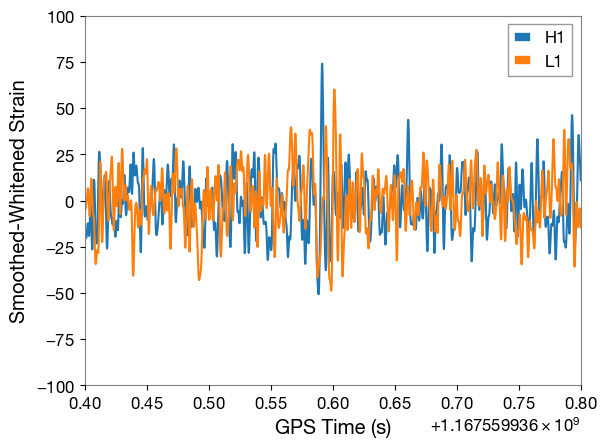

In [7]:
for ifo in ['H1', 'L1']:
    # Read data and remove low frequency content
    h1 = Merger("GW170104").strain(ifo)
    h1 = highpass_fir(h1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(smooth, 300, 8)

    # time shift and flip L1
    if ifo == 'L1':
        smooth *= -1
        smooth.roll(int(.007 / smooth.delta_t))

    plt.plot(smooth.sample_times, smooth, label=ifo)

plt.legend()
plt.xlim(1167559936.4,1167559936.8)
plt.ylim(-100, 100)
plt.ylabel('Smoothed-Whitened Strain')
plt.grid()
plt.xlabel('GPS Time (s)')
plt.show()

#1128678900.4

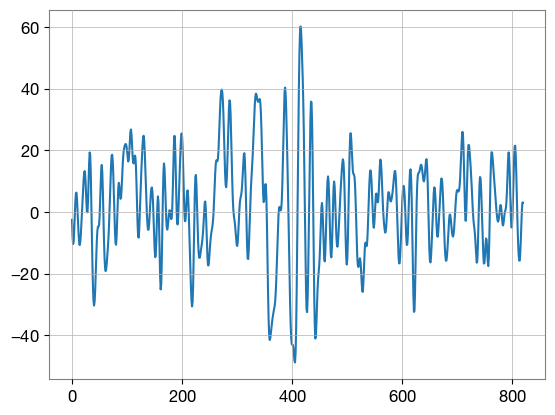

In [8]:
# plt.plot(smooth.sample_times,smooth)
# plt.xlim(1126259462.21, 1126259462.65)
# plt.ylim(-150, 150)
# plt.xlim(1167559936.4,1167559936.8)
delta_t = (smooth.sample_times[1] - smooth.sample_times[0])
delta_f = 1/delta_t
times = smooth.sample_times
# print(smooth[])
high_limit = 1167559936.4/delta_t
low_limit = 1167559936.8/delta_t
# print(smooth[4782325501132])
# smooth = smooth[int(low_limit):int(high_limit)]
time = np.linspace(0,0.4,1638)
# data_freq = np.fft.rfft(smooth) 
# freq_array = np.fft.rfftfreq(len(times),delta_t)

# high_cutoff = 300
# low_cutoff = 35

# high_limit = high_cutoff/delta_f+1
# low_limit = low_cutoff/delta_f

# data_final = data_freq[:int(high_limit)]
# freq_final = freq_array[:int(high_limit)]

mask = (times >= 1167559936.5) & (times <= 1167559936.7)
smooth_sliced = smooth[mask]
# times = 

plt.plot(smooth_sliced)


[415]


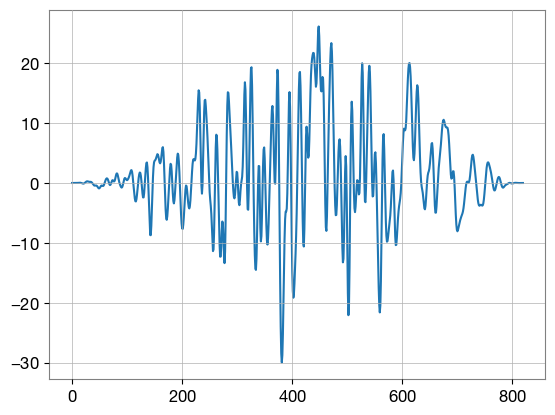

In [ ]:
mid_point = len(smooth) /2
final_point = len(smooth_sliced)
peaks,_ = find_peaks(smooth_sliced,height = 3e-21,distance = 1000)
print(peaks)
roll_amount = mid_point - peaks
centred = np.roll(smooth_sliced,int(roll_amount))
window = signal.windows.hann(len(centred))
centred_windowed_signal = centred*window
plt.plot(centred_windowed_signal)
centred_windowed_signal_final = np.roll(centred_windowed_signal,-int(roll_amount))
plt.plot(centred_windowed_signal_final)
plt.show()

In [62]:
print(duration)

32.0


In [ ]:
def template(theta,delta_t,f_lower,f_higher,delta_f):
    M1,M2,D= theta 

    hplus , hc = get_fd_waveform(mass1 = M1,mass2 = M2,distance = D, approximant='IMRPhenomPv2',f_lower=f_lower, f_higher=f_higher, delta_t = delta_t,delta_f = delta_f)

    hplus= hplus.cyclic_time_shift()
    if len(hplus) > len(smooth):
        hplus = hplus[:len(smooth)]
        return hplus
    
    if len(hplus) == len(smooth):
        return hplus
    
    if len(hplus) < len(smooth):
        pad_amount = len(smooth) - len(hplus)
        hplus = np.pad(hplus,(0,pad_amount),'constant',constant_values=(0,0))
        return hplus

In [ ]:
theta = 30.8,20,990,
temp = 

In [59]:
def log_prior(theta):
    M1,M2,D,time_shift = theta
    
    if not(33 < M1 < 37):
        return - np.inf
    
    if not(46 < M2 < 50):
        return -np.inf 
    
    if not(155 < D < 165):
        return -np.inf
    
    if not(6.4 < time_shift < 6.6):
        return -np.inf

    # if not(0<f_lower<1000):
    #     return -np.inf
    
    # if not(f_lower<f_higher<4000):
    #     return -np.inf
    
    return 0 + 2*np.log(D)

In [63]:
def log_like(theta, fft_signal,noise ,delta_t,delta_f):

    
    temp = template(theta, delta_t , 30, 1000,delta_f)

    residual = fft_signal*delta_t - temp
    summation = np.abs(residual)**2/noise
    return -2 / duration * sum((summation))

In [64]:
def log_posterior(theta, data,noise_data,delta_t,delta_f):
    # print(f"Theta: {theta}")
    log_pri = log_prior(theta)
    if np.isinf(log_pri):  # if prior is -inf, return stragiht away
        return log_pri
    return log_pri + log_like(theta, data, noise_data,delta_t,delta_f)

In [65]:
# defining the number of walkers in the mcmc chain and th number of dimensions (parameters)
nwalkers = 20
ndim = 4

# defining intitial array of guess (theta guesses)
initial = np.empty((nwalkers, ndim)) 
initial[:, 0] = np.random.uniform(33,37 , size=nwalkers)
initial[:, 1] = np.random.uniform(46, 50, size = nwalkers)#initial[:, 0])
initial[:, 2] = np.random.uniform(155, 165, size=nwalkers)
initial[:,3] = np.random.uniform(6.4,6.6, size = nwalkers)

#running the emcee sampelr
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(smooth,psd,delta_t,delta_f))#,moves= emcee.moves.StretchMove())

#running the burn - in stage of the mcmc chain to allow the walker tp explore the space
state = sampler.run_mcmc(initial, nsteps = 500,progress = True)
sampler.reset()
# running the mcmc

nsteps = 100
sampler.run_mcmc(initial, nsteps,progress = True)

emcee: Exception while calling your likelihood function:
  params: [ 33.41271868  47.39823646 157.8353457    6.47792717]
  args: (<pycbc.types.timeseries.TimeSeries object at 0x7f7dc7aa5670>, <pycbc.types.frequencyseries.FrequencySeries object at 0x7f7dbf170be0>, 0.000244140625, 4096)
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Users/maxrobertson/code/Grav Waves/venv/lib/python3.9/site-packages/emcee/ensemble.py", line 640, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/var/folders/96/6cy2m0cs6f58g_nf35j6n89c0000gn/T/ipykernel_66208/639526355.py", line 6, in log_posterior
    return log_pri + log_like(theta, data, noise_data,delta_t,delta_f)
  File "/var/folders/96/6cy2m0cs6f58g_nf35j6n89c0000gn/T/ipykernel_66208/2356312135.py", line 7, in log_like
    summation = np.abs(residual)**2/noise
TypeError: unsupported operand type(s) for /: 'TimeSeries' and 'FrequencySeries'


TypeError: unsupported operand type(s) for /: 'TimeSeries' and 'FrequencySeries'

In [5]:
from gwpy.timeseries import TimeSeries

# Define GPS time range (example: 600s of data)
start = 1266624018
end = 1266624618

# Fetch data from GWOSC (for LIGO Livingston strain channel 'L1:GWOSC-STRAIN')
data = TimeSeries.fetch_open_data("L1", start, end, cache=True)

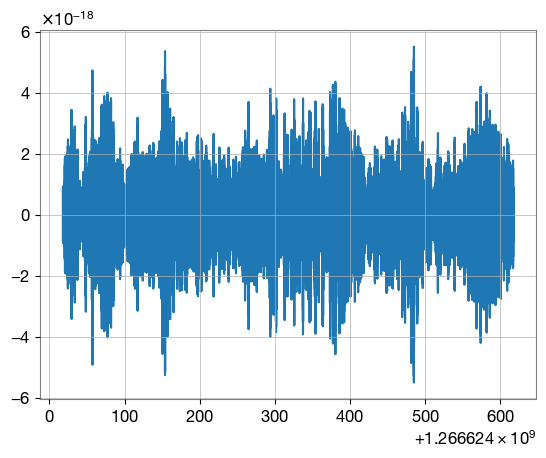

In [10]:
plt.plot(data)

In [25]:
# import bilby
# import numpy as np
# import matplotlib.pyplot as plt
# from bilby.gw.detector import InterferometerList
# from bilby.gw.prior import Uniform, PriorDict
# from bilby.core.likelihood import GaussianLikelihood

# data_file = "H-H1_GWOSC_4KHZ_R1-1187527209-4096.txt" 


# data = np.loadtxt(data_file,skiprows = 3) 

# priors = PriorDict()
# priors["mass_1"] = Uniform(10, 100, "M_sun")  
# priors["mass_2"] = Uniform(5, 100, "M_sun")   
# priors["luminosity_distance"] = Uniform(100, 5000, "Mpc") 
# priors["theta_jn"] = Uniform(0, np.pi)  
# priors["phase"] = Uniform(0, 2 * np.pi, "rad") 
# priors["geocent_time"] = Uniform(1126259462.4, 1126259462.6, "s")
# priors["psi"] = Uniform(0, np.pi) 
# priors["ra"] = Uniform(0, 2 * np.pi) 
# priors["dec"] = Uniform(-np.pi/2, np.pi/2)  
# priors["a_1"] = Uniform(0, 1)  
# priors["a_2"] = Uniform(0, 1) 
# priors["tilt_1"] = Uniform(0, np.pi)  
# priors["tilt_2"] = Uniform(0, np.pi)  
# priors["phi_12"] = Uniform(0, 2 * np.pi) 
# priors["phi_jl"] = Uniform(0, 2 * np.pi) 


# waveform_arguments = dict(
#     waveform_approximant="IMRPhenomPv2", 
#     reference_frequency=20.0, 
#     minimum_frequency=20.0
# )

# waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
#     duration=4, 
#     sampling_frequency=4096, 
#     frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
#     parameters=None,
#     waveform_arguments=waveform_arguments
# )

# # Step 4: Define the likelihood
# interferometers = InterferometerList(["H1", "L1", "V1"])  
# interferometers.set_strain_data_from_power_spectral_densities(
#     sampling_frequency=2048,
#     duration=4,
#     start_time=1126259460.0  # Adjust based on data
# )

# data_dict = dict(H1=data, L1=data, V1=data)  

# likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
#     interferometers=interferometers,
#     waveform_generator=waveform_generator,
#     time_marginalization=True,
#     phase_marginalization=True,
#     distance_marginalization=True,
#     priors = priors
# )

# # Step 5: Run the sampler (MCMC using `emcee`)
# result = bilby.run_sampler(
#     likelihood=likelihood,
#     priors=priors,
#     sampler="dynesty",
#     nwalkers=10,
#     nsteps=10,
#     # nburn = 100,
#     injection_parameters=None,
#     outdir="outdir",
#     label="GW_analysis"
# )

# # Step 6: Generate a corner plot of posterior distributions
# result.plot_corner()
# plt.show()

11:30 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
11:30 bilby INFO    : Injected signal in H1:
11:30 bilby INFO    :   optimal SNR = 11.78
11:30 bilby INFO    :   matched filter SNR = 10.70-1.01j
11:30 bilby INFO    :   mass_1 = 36.0
11:30 bilby INFO    :   mass_2 = 29.0
11:30 bilby INFO    :   a_1 = 0.4
11:30 bilby INFO    :   a_2 = 0.3
11:30 bilby INFO    :   tilt_1 = 0.5
11:30 bilby INFO    :   tilt_2 = 1.0
11:30 bilby INFO    :   phi_12 = 1.7
11:30 bilby INFO    :   phi_jl = 0.3
11:30 bilby INFO    :   luminosity_distance = 2000.0
11:30 bilby INFO    :   theta_jn = 0.4
11:30 bilby INFO    :   psi = 2.659
11:30 bilby INFO    :   phase = 1.3
11:30 bilby INFO    :   geocent_time = 1126259642.413
11:30 bilby INFO    :   ra = 1.375
11:30 bilby INFO    :   dec = -1.2108
11:30 bilby INFO    : I

98it [01:37,  1.01s/it, bound:8 nc: 72 ncall:4.6e+03 eff:2.1% logz-ratio=74.58+/-0.94 dlogz:3.302>0.1]   

/Users/maxrobertson/code/Grav Waves/venv/lib/python3.9/site-packages/dynesty/sampler.py:761: UserWarning: The sampling was stopped short due to maxiter/maxcall limit the delta(log(z)) criterion is not achieved; posterior may be poorly sampled
  warnings.warn('The sampling was stopped short due to'


137it [02:56,  1.85s/it, bound:14 nc:125 ncall:8.7e+03 eff:1.6% logz-ratio=76.76+/-0.80 dlogz:0.125>0.1]

11:33 bilby INFO    : Written checkpoint file outdir/fast_tutorial_resume.pickle


139it [02:59,  1.30s/it, bound:15 nc:  1 ncall:9.0e+03 eff:1.7% logz-ratio=76.84+/-0.92 dlogz:0.008>0.1]

11:33 bilby INFO    : Rejection sampling nested samples to obtain 25 posterior samples
11:33 bilby INFO    : Sampling time: 0:02:59.272976
11:33 bilby INFO    : Summary of results:
nsamples: 25
ln_noise_evidence: -8101.653
ln_evidence: -8024.809 +/-  1.000
ln_bayes_factor: 76.844 +/-  1.000



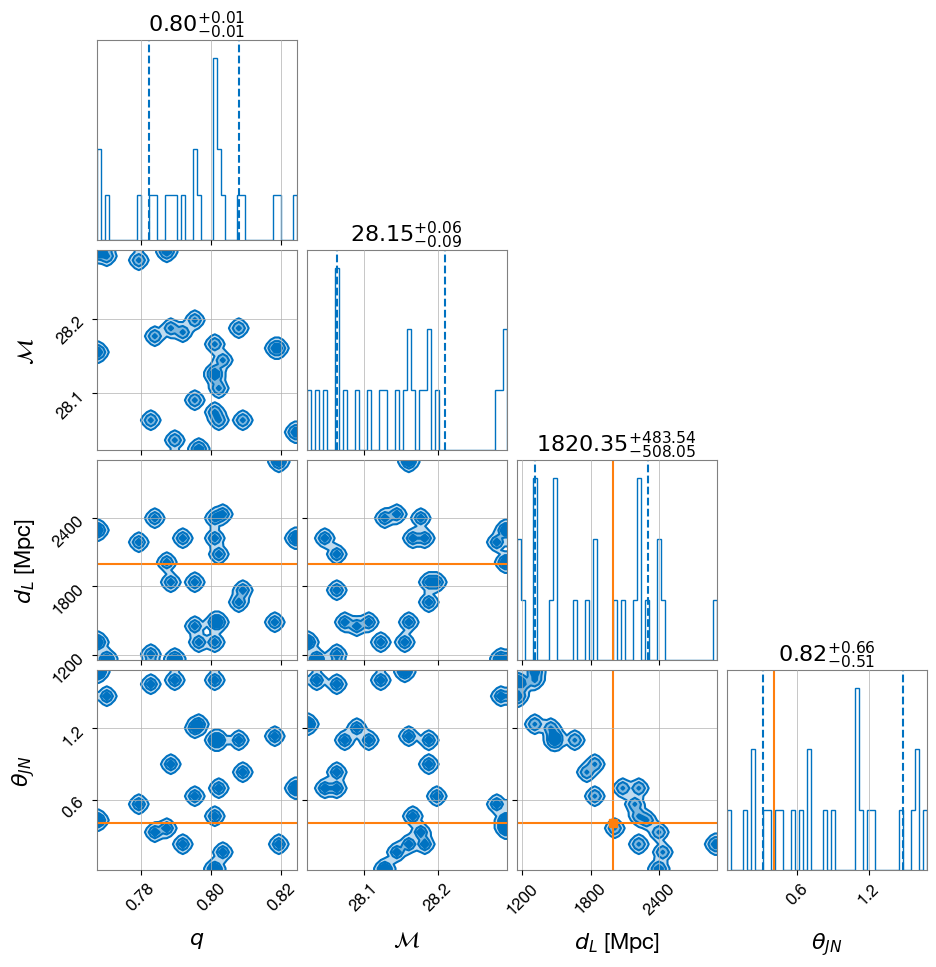

In [ ]:
# # this is jsut a test to see if its working 

# # Set the duration and sampling frequency of the data segment that we're
# # going to inject the signal into
# duration = 4.0
# sampling_frequency = 2048.0
# minimum_frequency = 20

# # Specify the output directory and the name of the simulation.
# outdir = "outdir"
# label = "fast_tutorial"
# bilby.core.utils.setup_logger(outdir=outdir, label=label)

# # Set up a random seed for result reproducibility.  This is optional!
# bilby.core.utils.random.seed(88170235)

# # We are going to inject a binary black hole waveform.  We first establish a
# # dictionary of parameters that includes all of the different waveform
# # parameters, including masses of the two black holes (mass_1, mass_2),
# # spins of both black holes (a, tilt, phi), etc.
# injection_parameters = dict(
#     mass_1=36.0,
#     mass_2=29.0,
#     a_1=0.4,
#     a_2=0.3,
#     tilt_1=0.5,
#     tilt_2=1.0,
#     phi_12=1.7,
#     phi_jl=0.3,
#     luminosity_distance=2000.0,
#     theta_jn=0.4,
#     psi=2.659,
#     phase=1.3,
#     geocent_time=1126259642.413,
#     ra=1.375,
#     dec=-1.2108,
# )

# # Fixed arguments passed into the source model
# waveform_arguments = dict(
#     waveform_approximant="IMRPhenomPv2",
#     reference_frequency=50.0,
#     minimum_frequency=minimum_frequency,
# )

# # Create the waveform_generator using a LAL BinaryBlackHole source function
# waveform_generator = bilby.gw.WaveformGenerator(
#     duration=duration,
#     sampling_frequency=sampling_frequency,
#     frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
#     parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
#     waveform_arguments=waveform_arguments,
# )

# # Set up interferometers.  In this case we'll use two interferometers
# # (LIGO-Hanford (H1), LIGO-Livingston (L1). These default to their design
# # sensitivity
# ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
# ifos.set_strain_data_from_power_spectral_densities(
#     sampling_frequency=sampling_frequency,
#     duration=duration,
#     start_time=injection_parameters["geocent_time"] - 2,
# )
# ifos.inject_signal(
#     waveform_generator=waveform_generator, parameters=injection_parameters
# )

# # Set up a PriorDict, which inherits from dict.
# # By default we will sample all terms in the signal models.  However, this will
# # take a long time for the calculation, so for this example we will set almost
# # all of the priors to be equall to their injected values.  This implies the
# # prior is a delta function at the true, injected value.  In reality, the
# # sampler implementation is smart enough to not sample any parameter that has
# # a delta-function prior.
# # The above list does *not* include mass_1, mass_2, theta_jn and luminosity
# # distance, which means those are the parameters that will be included in the
# # sampler.  If we do nothing, then the default priors get used.
# priors = bilby.gw.prior.BBHPriorDict()
# for key in [
#     "a_1",
#     "a_2",
#     "tilt_1",
#     "tilt_2",
#     "phi_12",
#     "phi_jl",
#     "psi",
#     "ra",
#     "dec",
#     "geocent_time",
#     "phase",
# ]:
#     priors[key] = injection_parameters[key]

# # Perform a check that the prior does not extend to a parameter space longer than the data
# priors.validate_prior(duration, minimum_frequency)

# # Initialise the likelihood by passing in the interferometer data (ifos) and
# # the waveform generator
# likelihood = bilby.gw.GravitationalWaveTransient(
#     interferometers=ifos, waveform_generator=waveform_generator
# )

# # Run sampler.  In this case we're going to use the `dynesty` sampler
# result = bilby.run_sampler(
#     likelihood=likelihood,
#     priors=priors,
#     sampler="dynesty",
#     npoints=10,
#     injection_parameters=injection_parameters,
#     outdir=outdir,
#     label=label,
# )

# # Make a corner plot.
# result.plot_corner()
